# Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('./data/heart.csv')
dataset = pd.DataFrame(dataset)
dataset.head()
mylist = dataset.columns
print(mylist)

# Mengambil dan mendefinisikan data
Age = dataset['age']
Sex = dataset['sex']
ChestPain = dataset['cp'] # Type of Chest Pain
RestBP = dataset['trestbps'] # Rest of Blood Pressure
FBS = dataset['fbs']
Cholesterol = dataset['chol'] # Cholesterol in mg/dl
RestECG = dataset['restecg'] # Rest ECG result (values 0,1,2)
MaxHR = dataset['thalach'] # Maximum Heart Rate
ExAng = dataset['exang'] # Excercise Induces Angina
OldPeak = dataset['oldpeak'] # ST depression induced by exercise relative to rest
SlopeOP = dataset['slope'] # the slope of the peak exercise ST segment
CA = dataset['ca']
Thal = dataset['thal'] # 1 Normal, 2 Fixed defect, 3 Reversable defect
Target = dataset['target'] # 0 No disease, 1 Disease

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


# Classifications with MLP

In [3]:
# Softmax function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    m = y_pred.shape[0]
    log_likelihood = -(y_true * np.log(y_pred))  # Adding a small constant to avoid log(0)
    loss = np.sum(log_likelihood) / m
    return loss

# One-hot encoding
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Accuracy calculation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

class SimpleMLP:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = []
        self.biases = []

        # Initialize weights and biases for each layer
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def feedforward(self, X):
        activation = X
        for i in range(len(self.weights)):
            z = np.dot(activation, self.weights[i]) + self.biases[i]
            activation = softmax(z)  # Using softmax for all layers
        return activation

    def backpropagation(self, X, y, learning_rate):
        m = X.shape[0]
        # Forward pass
        activations = [X]
        zs = []  # to store all z vectors layer by layer

        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(softmax(z))  # Using softmax for all layers
            zs.append(z)

        # Backward pass
        delta = activations[-1] - one_hot(y, self.layer_sizes[-1])
        for l in range(len(self.weights) - 1, -1, -1):
            delta_w = np.dot(activations[l].T, delta) / m
            delta_b = np.sum(delta, axis=0, keepdims=True) / m
            self.weights[l] -= learning_rate * delta_w
            self.biases[l] -= learning_rate * delta_b

            if l > 0:
                # Derivative of softmax
                delta = np.dot(delta, self.weights[l].T) * activations[l] * (1 - activations[l])

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = cross_entropy_loss(one_hot(y, self.layer_sizes[-1]), output)
                print(f"Epoch {epoch}, Loss: {loss}")

## MLP with Two Hidden Layers (5 and 10 Neurons) for Heart Disease Classification

In [4]:
# Set the seed for reproducibility
np.random.seed(25)

#data preparation
features = np.column_stack([Age,Sex,ChestPain,RestBP,FBS,Cholesterol,RestECG,MaxHR,ExAng,OldPeak,SlopeOP,CA,Thal])
labels = Target
#Split the dataset manually
split_ratio = 0.7
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Training the model
layer_sizes = [13, 5, 10, 2]  # 13 input features, two hidden layers with 5 neurons and 10 neurons, and 2 output neurons

mlp = SimpleMLP(layer_sizes)
mlp.train(X_train, y_train, epochs=50000, learning_rate=10**(-3))

y_pred = np.argmax(mlp.feedforward(X_test), axis =1)
accuracy_result = accuracy(y_test,y_pred)
print("akurasi :", accuracy_result)

Epoch 0, Loss: 0.6931820530655249
Epoch 1000, Loss: 0.6926856852125758
Epoch 2000, Loss: 0.692520472047502
Epoch 3000, Loss: 0.6924654594865337
Epoch 4000, Loss: 0.6924471348933887
Epoch 5000, Loss: 0.6924410292607395
Epoch 6000, Loss: 0.6924389943060145
Epoch 7000, Loss: 0.6924383157379067
Epoch 8000, Loss: 0.6924380892039038
Epoch 9000, Loss: 0.6924380133507463
Epoch 10000, Loss: 0.6924379877512585
Epoch 11000, Loss: 0.6924379789352981
Epoch 12000, Loss: 0.692437975746891
Epoch 13000, Loss: 0.692437974466782
Epoch 14000, Loss: 0.6924379738542478
Epoch 15000, Loss: 0.692437973494645
Epoch 16000, Loss: 0.6924379732486722
Epoch 17000, Loss: 0.6924379730688122
Epoch 18000, Loss: 0.6924379729381506
Epoch 19000, Loss: 0.6924379728499834
Epoch 20000, Loss: 0.6924379728010176
Epoch 21000, Loss: 0.6924379727891046
Epoch 22000, Loss: 0.6924379728124835
Epoch 23000, Loss: 0.6924379728695298
Epoch 24000, Loss: 0.69243797295867
Epoch 25000, Loss: 0.6924379730783545
Epoch 26000, Loss: 0.6924379732

## MLP with Two Hidden Layers (5 and 20 Neurons) for Heart Disease Classification

In [5]:
# Set the seed for reproducibility
np.random.seed(25)

#data preparation
features = np.column_stack([Age,Sex,ChestPain,RestBP,FBS,Cholesterol,RestECG,MaxHR,ExAng,OldPeak,SlopeOP,CA,Thal])
labels = Target
#Split the dataset manually
split_ratio = 0.7
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Training the model
layer_sizes = [13, 5, 20, 2]  # 13 input features, two hidden layers with 5 neurons and 10 neurons, and 2 output neurons

mlp = SimpleMLP(layer_sizes)
mlp.train(X_train, y_train, epochs=50000, learning_rate=10**(-3))

y_pred = np.argmax(mlp.feedforward(X_test), axis =1)
accuracy_result = accuracy(y_test,y_pred)
print("akurasi :", accuracy_result)

Epoch 0, Loss: 0.6930577145226965
Epoch 1000, Loss: 0.6926544819561528
Epoch 2000, Loss: 0.6925133616841718
Epoch 3000, Loss: 0.6924639434111853
Epoch 4000, Loss: 0.6924466199291797
Epoch 5000, Loss: 0.6924405325086346
Epoch 6000, Loss: 0.6924383789022235
Epoch 7000, Loss: 0.692437601937706
Epoch 8000, Loss: 0.6924373059127735
Epoch 9000, Loss: 0.6924371770225793
Epoch 10000, Loss: 0.6924371052956252
Epoch 11000, Loss: 0.6924370521738525
Epoch 12000, Loss: 0.6924370041274522
Epoch 13000, Loss: 0.6924369564065826
Epoch 14000, Loss: 0.6924369073504609
Epoch 15000, Loss: 0.6924368563948864
Epoch 16000, Loss: 0.6924368033752172
Epoch 17000, Loss: 0.6924367482828343
Epoch 18000, Loss: 0.6924366911800222
Epoch 19000, Loss: 0.6924366321698131
Epoch 20000, Loss: 0.6924365713845091
Epoch 21000, Loss: 0.6924365089801588
Epoch 22000, Loss: 0.6924364451325685
Epoch 23000, Loss: 0.6924363800333719
Epoch 24000, Loss: 0.6924363138857514
Epoch 25000, Loss: 0.6924362468998094
Epoch 26000, Loss: 0.69243

## MLP with Three Hidden Layers (5, 10, and 15 Neurons) for Heart Disease Classification

In [6]:
# Set the seed for reproducibility
np.random.seed(25)

#data preparation
features = np.column_stack([Age,Sex,ChestPain,RestBP,FBS,Cholesterol,RestECG,MaxHR,ExAng,OldPeak,SlopeOP,CA,Thal])
labels = Target
#Split the dataset manually
split_ratio = 0.7
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Training the model
layer_sizes = [13, 5, 10,15, 2]  # 13 input features, three hidden layers with 5,10,15 neurons, and 2 output neurons

mlp = SimpleMLP(layer_sizes)
mlp.train(X_train, y_train, epochs=50000, learning_rate=10**(-3))

y_pred = np.argmax(mlp.feedforward(X_test), axis =1)
accuracy_result = accuracy(y_test,y_pred)
print("akurasi :", accuracy_result)

Epoch 0, Loss: 0.693156854083655
Epoch 1000, Loss: 0.6926854188326034
Epoch 2000, Loss: 0.6925231829635058
Epoch 3000, Loss: 0.6924673314294786
Epoch 4000, Loss: 0.6924480977247858
Epoch 5000, Loss: 0.6924414726962896
Epoch 6000, Loss: 0.6924391903861942
Epoch 7000, Loss: 0.6924384040653182
Epoch 8000, Loss: 0.6924381331409263
Epoch 9000, Loss: 0.6924380397917607
Epoch 10000, Loss: 0.6924380076268938
Epoch 11000, Loss: 0.6924379965438171
Epoch 12000, Loss: 0.6924379927248238
Epoch 13000, Loss: 0.6924379914088118
Epoch 14000, Loss: 0.6924379909552547
Epoch 15000, Loss: 0.6924379907988755
Epoch 16000, Loss: 0.6924379907448955
Epoch 17000, Loss: 0.6924379907261995
Epoch 18000, Loss: 0.6924379907196614
Epoch 19000, Loss: 0.6924379907173126
Epoch 20000, Loss: 0.6924379907164073
Epoch 21000, Loss: 0.6924379907159993
Epoch 22000, Loss: 0.6924379907157627
Epoch 23000, Loss: 0.6924379907155852
Epoch 24000, Loss: 0.692437990715428
Epoch 25000, Loss: 0.6924379907152777
Epoch 26000, Loss: 0.692437

# Classifications with FNN (with TensorFlow)

## Feedforward Neural Network (128-64 Units) for Heart Disease Classification – 50 Epochs

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Dataset
X_train = np.column_stack([Age,Sex,ChestPain,RestBP,FBS,Cholesterol,RestECG,MaxHR,ExAng,OldPeak,SlopeOP,CA,Thal])
y_train = Target

# Building the Feedforward Neural Network model
model = Sequential()

# First hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(13,)))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model to the training set
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Model summary
model.summary()

Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4643 - loss: 17.7957
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5095 - loss: 8.7245  
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5314 - loss: 4.4351 
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5329 - loss: 3.2304 
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5348 - loss: 2.0144 
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5291 - loss: 1.3525 
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5352 - loss: 1.1505 
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5741 - loss: 0.9738 
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6087 - loss: 0.8221 
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5391 - loss: 0.8446 
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5317 - loss: 0.8335 
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5638 - l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)

## Feedforward Neural Network (128-64 Units) for Heart Disease Classification – 500 Epochs

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Dataset
X_train = np.column_stack([Age,Sex,ChestPain,RestBP,FBS,Cholesterol,RestECG,MaxHR,ExAng,OldPeak,SlopeOP,CA,Thal])
y_train = Target

# Building the Feedforward Neural Network model
model = Sequential()

# First hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(13,)))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model to the training set
model.fit(X_train, y_train, epochs=500, batch_size=32)

# Model summary
model.summary()

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4907 - loss: 26.4202   
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5333 - loss: 11.3875
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5347 - loss: 7.0868 
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5256 - loss: 4.2722 
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5111 - loss: 3.1348 
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5418 - loss: 1.8846 
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5094 - loss: 1.6370 
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5357 - loss: 1.1996 
Epoch 9/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5240 - loss: 1.0975 
Epoch 10/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4965 - loss: 0.9817 
Epoch 11/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5308 - loss: 0.8185 
Epoch 12/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)

## Feedforward Neural Network (256-128 Units) for Heart Disease Classification – 500 Epochs

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Dataset
X_train = np.column_stack([Age,Sex,ChestPain,RestBP,FBS,Cholesterol,RestECG,MaxHR,ExAng,OldPeak,SlopeOP,CA,Thal])
y_train = Target

# Building the Feedforward Neural Network model
model = Sequential()

# First hidden layer
model.add(Dense(units=256, activation='relu', input_shape=(13,)))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model to the training set
model.fit(X_train, y_train, epochs=500, batch_size=32)

# Model summary
model.summary()

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5196 - loss: 13.7655
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5219 - loss: 7.4391
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 3.7671
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5692 - loss: 2.2918 
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5598 - loss: 1.8397 
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5443 - loss: 1.3577 
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5787 - loss: 0.8887 
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5697 - loss: 0.8958 
Epoch 9/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5814 - loss: 0.7996 
Epoch 10/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 0.7991 
Epoch 11/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5889 - loss: 0.7178 
Epoch 12/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,829 (429.02 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,220 (286.02 KB)

# Classifications with CNN (with PCA)

In [10]:
# Transform Data with PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your multivariable dataset
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.iloc[:,0:13])

# Step 2: Initialize PCA and fit to the scaled data
pca = PCA(n_components=9)  # Set the number of components to 2
pca.fit(scaled_data)

# Step 3: Project data onto principal components
reduced_data = pca.transform(scaled_data)
data_CNN = pd.concat([pd.DataFrame(reduced_data), Target], axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

x_train, x_test, y_train, y_test = train_test_split(data_CNN.iloc[:, 0:9].values, data_CNN['target'].values, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=data_CNN['target'].values)

if 0.7*x_train.shape[0] < 2500:
    train_split = 0.8
else:
    train_split = 0.7
# train_split = 0.7
print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split,
                                                random_state=2, shuffle=True, stratify=y_train)
mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

train_split = 0.8
Shape of x, y train/cv/test (656, 9) (656,) (164, 9) (164,) (205, 9) (205,)


In [12]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [13]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights")
rand_idx = np.random.randint(0, 650, 30)
print(y_train[rand_idx])
print(sample_weights[rand_idx])

real class weights are [1.02821317 0.97329377] [0 1]
value_counts (array([0, 1]), array([319, 337], dtype=int64))
Test sample_weights
[1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0]
[0.97329377 0.97329377 0.97329377 0.97329377 0.97329377 1.02821317
 0.97329377 1.02821317 1.02821317 0.97329377 0.97329377 1.02821317
 1.02821317 1.02821317 1.02821317 1.02821317 1.02821317 1.02821317
 1.02821317 1.02821317 1.02821317 1.02821317 0.97329377 1.02821317
 1.02821317 1.02821317 0.97329377 0.97329377 1.02821317 1.02821317]


In [14]:
one_hot_enc = OneHotEncoder(sparse_output=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
print("y_train",y_train.shape)
y_cv = one_hot_enc.transform(y_cv.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.reshape(-1, 1))

y_train (656, 2)


In [15]:
dim = int(np.sqrt(9))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (656, 3, 3, 3) (656, 2) (205, 3, 3, 3) (205, 2)


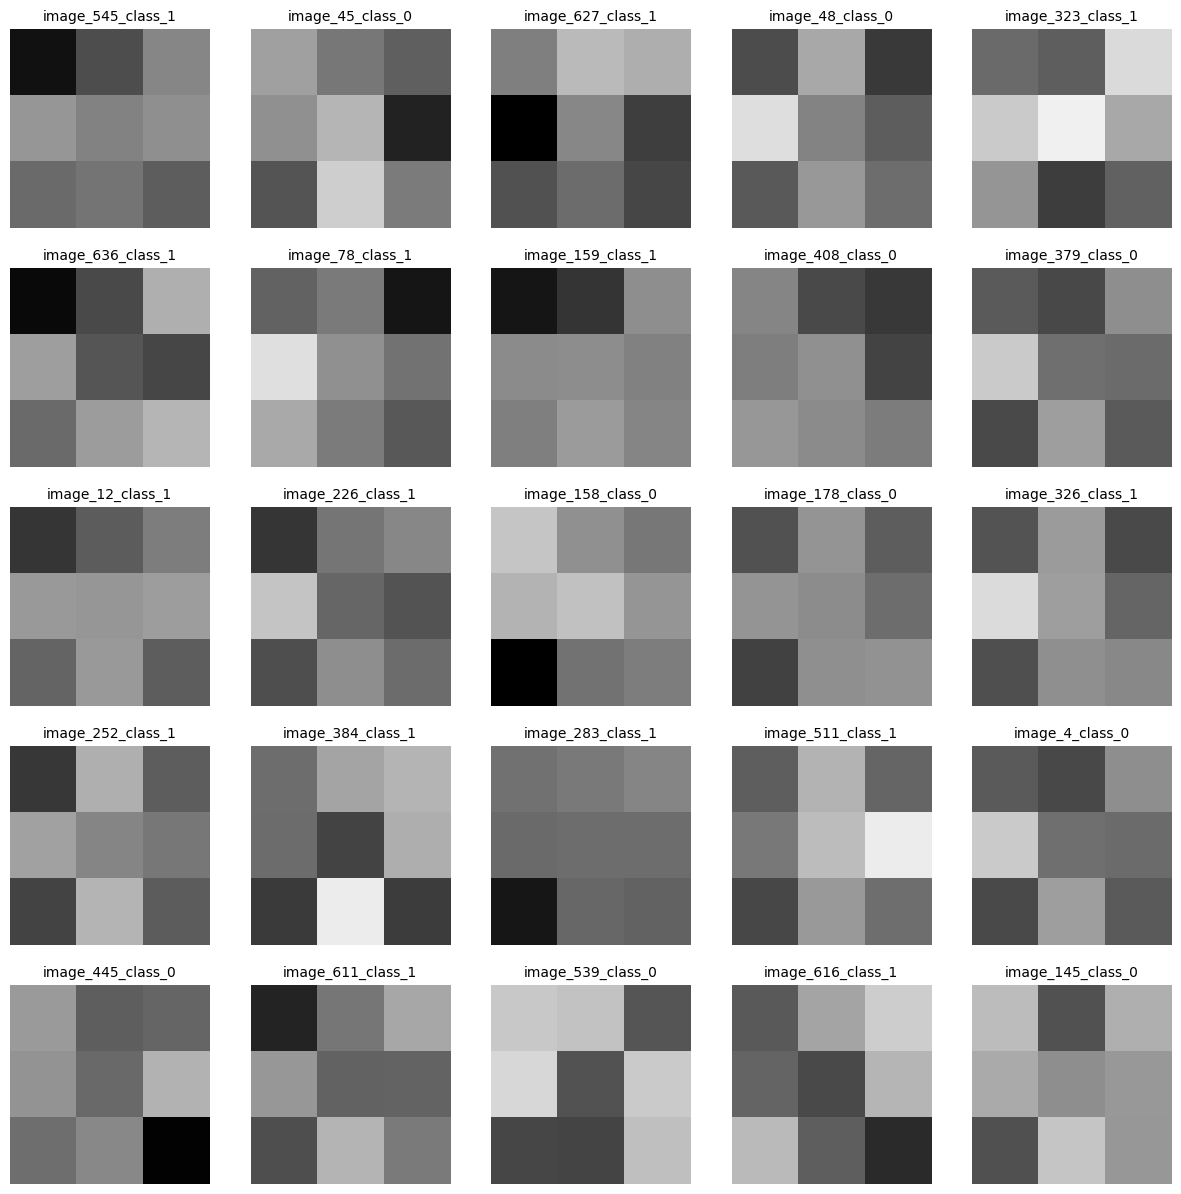

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 5
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()


In [17]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

params = {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.22, 'conv2d_filters_1': 20, 'conv2d_kernel_size_1': 2, 'conv2d_mp_1': 2,
                                              'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.05,
                                              'conv2d_filters_2': 40, 'conv2d_kernel_size_2': 2, 'conv2d_mp_2': 2, 'conv2d_strides_2': 2,
                                              'kernel_regularizer_2': 0.0, 'layers': 'two'},
          'dense_layers': {'dense_do_1': 0.22, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
          'epochs': 300, 'lr': 0.001, 'optimizer': 'adam'}

In [18]:
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

def f1_custom(y_true, y_pred):
    y_t = np.argmax(y_true, axis=1)
    y_p = np.argmax(y_pred, axis=1)
    f1_score(y_t, y_p, labels=None, average='weighted', sample_weight=None, zero_division='warn')

def create_model_cnn(params):
    model = Sequential()

    print("Training with params {}".format(params))
    # (batch_size, timesteps, data_dim)
    # x_train, y_train = get_data_cnn(df, df.head(1).iloc[0]["timestamp"])[0:2]
    conv2d_layer1 = Conv2D(params["conv2d_layers"]["conv2d_filters_1"],
                           params["conv2d_layers"]["conv2d_kernel_size_1"],
                           strides=params["conv2d_layers"]["conv2d_strides_1"],
                           kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_1"]),
                           padding='valid',activation="relu", use_bias=True,
                           kernel_initializer='glorot_uniform',
                           input_shape=(x_train[0].shape[0],
                                        x_train[0].shape[1], x_train[0].shape[2]))
    model.add(conv2d_layer1)
    if params["conv2d_layers"]['conv2d_mp_1'] == 1:
        model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(params['conv2d_layers']['conv2d_do_1']))
    if params["conv2d_layers"]['layers'] == 'two':
        conv2d_layer2 = Conv2D(params["conv2d_layers"]["conv2d_filters_2"],
                               params["conv2d_layers"]["conv2d_kernel_size_2"],
                               strides=params["conv2d_layers"]["conv2d_strides_2"],
                               kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_2"]),
                               padding='valid',activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform')
        model.add(conv2d_layer2)
        if params["conv2d_layers"]['conv2d_mp_2'] == 1:
            model.add(MaxPool2D(pool_size=2))
        model.add(Dropout(params['conv2d_layers']['conv2d_do_2']))

    model.add(Flatten())

    model.add(Dense(params['dense_layers']["dense_nodes_1"], activation='relu'))
    model.add(Dropout(params['dense_layers']['dense_do_1']))

    if params['dense_layers']["layers"] == 'two':
        model.add(Dense(params['dense_layers']["dense_nodes_2"], activation='relu',
                        kernel_regularizer=params['dense_layers']["kernel_regularizer_1"]))
        model.add(Dropout(params['dense_layers']['dense_do_2']))

    model.add(Dense(2, activation='softmax'))
    if params["optimizer"] == 'rmsprop':
        optimizer = optimizers.RMSprop(lr=params["lr"])
    elif params["optimizer"] == 'sgd':
        optimizer = optimizers.SGD(lr=params["lr"], decay=1e-6, momentum=0.9, nesterov=True)
    elif params["optimizer"] == 'adam':
        optimizer = optimizers.Adam(learning_rate=params["lr"], beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_metric])
    # from keras.utils.vis_utils import plot_model use this too for diagram with plot
    # model.summary(print_fn=lambda x: print(x + '\n'))
    return model

def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[1][2]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

Training with params {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.22, 'conv2d_filters_1': 20, 'conv2d_kernel_size_1': 2, 'conv2d_mp_1': 2, 'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.05, 'conv2d_filters_2': 40, 'conv2d_kernel_size_2': 2, 'conv2d_mp_2': 2, 'conv2d_strides_2': 2, 'kernel_regularizer_2': 0.0, 'layers': 'two'}, 'dense_layers': {'dense_do_1': 0.22, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'}, 'epochs': 300, 'lr': 0.001, 'optimizer': 'adam'}


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


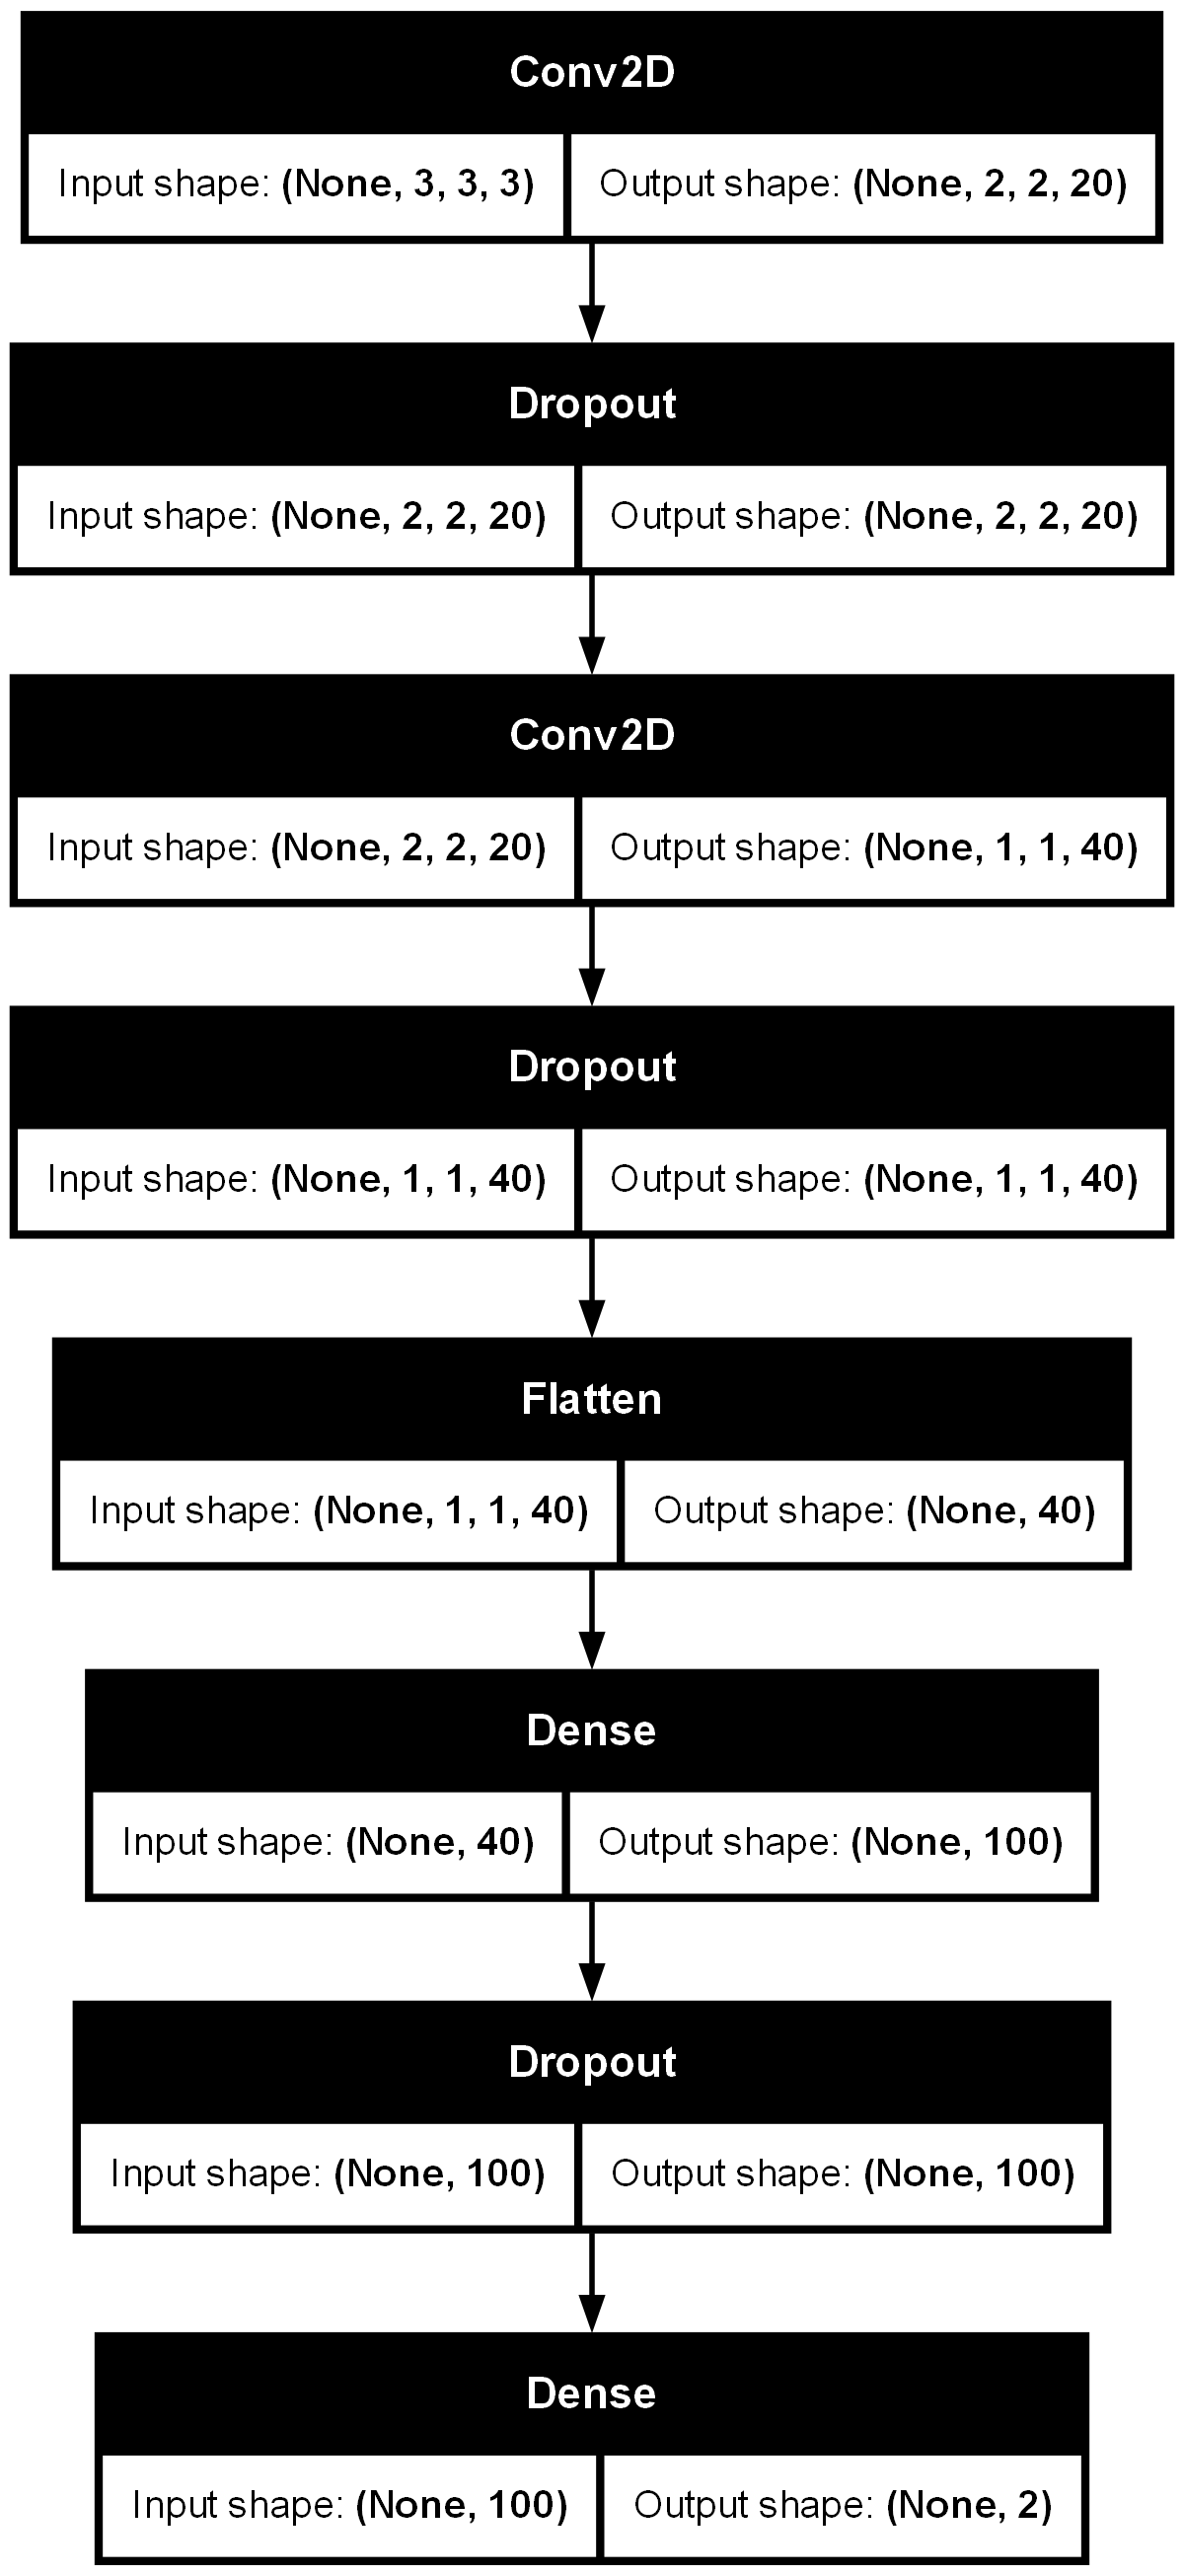

In [ ]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

model = create_model_cnn(params)
plot_model(model, to_file='./best model/model_CNN.png', show_shapes=True, show_layer_names=False)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [24]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

best_model_path = os.path.join('.', 'best_model_keras.keras')  # <-- notice the .keras extension

es = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1,
    patience=100, min_delta=0.0001
)

rlp = ReduceLROnPlateau(
    monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
    min_delta=0.001, cooldown=1, min_lr=0.0001
)

mcp = ModelCheckpoint(
    best_model_path,
    monitor='val_f1_metric',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='max'
)


In [26]:
%%time
history = model.fit(x_train, y_train, epochs=params['epochs'], verbose=1,
                            batch_size=80, shuffle=True,
                            # validation_split=0.3,
                            validation_data=(x_cv, y_cv),
                            callbacks=[mcp, rlp, es]
                            , sample_weight=sample_weights)

Epoch 1/300
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9436 - f1_metric: 0.9436 - loss: 0.1369
Epoch 1: val_f1_metric did not improve from 0.97500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9464 - f1_metric: 0.9451 - loss: 0.1347 - val_accuracy: 0.9634 - val_f1_metric: 0.9750 - val_loss: 0.1652 - learning_rate: 1.0000e-04
Epoch 2/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9500 - f1_metric: 0.9500 - loss: 0.1566
Epoch 2: val_f1_metric did not improve from 0.97500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9476 - f1_metric: 0.9474 - loss: 0.1421 - val_accuracy: 0.9512 - val_f1_metric: 0.8875 - val_loss: 0.1622 - learning_rate: 1.0000e-04
Epoch 3/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9125 - f1_metric: 0.9125 - loss: 0.2188
Epoch 3: val_f1_metric did not improve from 0.97500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9406 - f1_metric: 0.9416 - loss: 0.1476 - val_accuracy: 0.9634 - val_f1_metric: 0.9750 - val_loss: 0.1649 - l

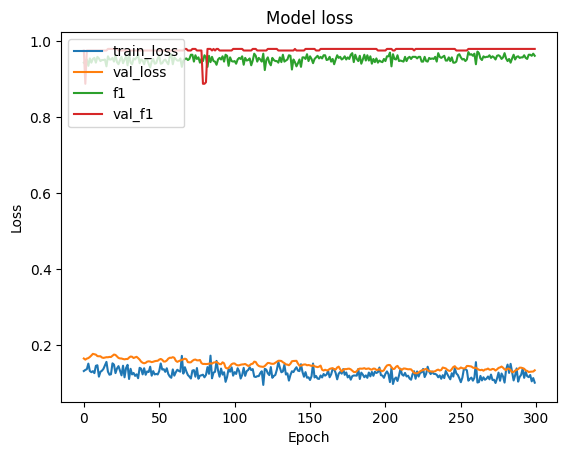

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'f1', 'val_f1'], loc='upper left')
plt.show()


In [28]:
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

model = load_model(best_model_path)
test_res = model.evaluate(x_test, y_test, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#check_baseline(pred_classes, y_test_classes)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1,2]
# ax = sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
# ax.xaxis.set_ticks_position('top')
f1_weighted = f1_score(y_test_classes, pred_classes, labels=None,
         average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None,
         average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None,
         average='micro', sample_weight=None))  # weighted and micro preferred in case of imbalance
# https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa --> supports multiclass; ref: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
print("cohen's Kappa", cohen_kappa_score(y_test_classes, pred_classes))

prec = []
for i, row in enumerate(conf_mat):
    prec.append(np.round(row[i]/np.sum(row), 2))
    print("precision of class {} = {}".format(i, prec[i]))
print("precision avg", sum(prec)/len(prec))

keras evaluate= [0.13359643518924713, 0.9512194991111755, 0.9488323926925659]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[97  3]
 [ 7 98]]
F1 score (weighted) 0.9512241553026609
F1 score (macro) 0.9512183514182372
F1 score (micro) 0.9512195121951219
cohen's Kappa 0.9024738344433872
precision of class 0 = 0.97
precision of class 1 = 0.93
precision avg 0.95


# Classifications with CNN

In [29]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

df = dataset

list_features = list(df.iloc[:, 0:13].columns)
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13].values, Target.values, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=Target.values)

# smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))

if 0.7*x_train.shape[0] < 2500:
    train_split = 0.8
else:
    train_split = 0.7
# train_split = 0.7
print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split,
                                                random_state=2, shuffle=True, stratify=y_train)
mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Total number of features 13
train_split = 0.8
Shape of x, y train/cv/test (656, 13) (656,) (164, 13) (164,) (205, 13) (205,)


In [30]:
num_features = 9  # should be a perfect square
selection_method = 'all'
topk = 13 if selection_method == 'all' else num_features

In [31]:
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

if selection_method == 'anova' or selection_method == 'all':
    select_k_best = SelectKBest(f_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(selected_features_anova)
    print(select_k_best.get_support(indices=True))
    print("****************************************")

if selection_method == 'mutual_info' or selection_method == 'all':
    select_k_best = SelectKBest(mutual_info_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(len(selected_features_mic), selected_features_mic)
    print(select_k_best.get_support(indices=True))

('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
****************************************


SelectKBest(k=13,
            score_func=<function mutual_info_classif at 0x000001C557963E20>)

13 ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [32]:
if selection_method == 'all':
    common = list(set(selected_features_anova).intersection(selected_features_mic))
    print("common selected featues", len(common), common)
    if len(common) < num_features:
        raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
    feat_idx = []
    for c in common:
        feat_idx.append(list_features.index(c))
    feat_idx = sorted(feat_idx[0:num_features])
    print(feat_idx)

common selected featues 13 ['cp', 'slope', 'exang', 'thal', 'oldpeak', 'trestbps', 'restecg', 'thalach', 'ca', 'chol', 'sex', 'age', 'fbs']
[2, 3, 6, 7, 8, 9, 10, 11, 12]


In [33]:
if selection_method == 'all':
    x_train = x_train[:, feat_idx]
    x_cv = x_cv[:, feat_idx]
    x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape,
                                                             y_train.shape,
                                                             x_cv.shape,
                                                             y_cv.shape,
                                                             x_test.shape,
                                                             y_test.shape
                                                             ))

Shape of x, y train/cv/test (656, 9) (656,) (164, 9) (164,) (205, 9) (205,)


In [34]:
_labels, _counts = np.unique(y_train, return_counts=True)
print("percentage of class 0 = {}, class 1 = {}".format(_counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100,  ))

percentage of class 0 = 48.6280487804878, class 1 = 51.37195121951219


In [35]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [36]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights")
rand_idx = np.random.randint(0, 656, 30)
print(y_train[rand_idx])
print(sample_weights[rand_idx])

real class weights are [1.02821317 0.97329377] [0 1]
value_counts (array([0, 1]), array([319, 337], dtype=int64))
Test sample_weights
[1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1]
[0.97329377 0.97329377 1.02821317 0.97329377 1.02821317 1.02821317
 1.02821317 0.97329377 0.97329377 1.02821317 0.97329377 0.97329377
 0.97329377 0.97329377 1.02821317 0.97329377 1.02821317 1.02821317
 0.97329377 0.97329377 1.02821317 1.02821317 0.97329377 1.02821317
 0.97329377 1.02821317 0.97329377 0.97329377 1.02821317 0.97329377]


In [37]:
one_hot_enc = OneHotEncoder(sparse_output=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
print("y_train",y_train.shape)
y_cv = one_hot_enc.transform(y_cv.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.reshape(-1, 1))

y_train (656, 2)


In [38]:
dim = int(np.sqrt(num_features))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (656, 3, 3, 3) (656, 2) (205, 3, 3, 3) (205, 2)


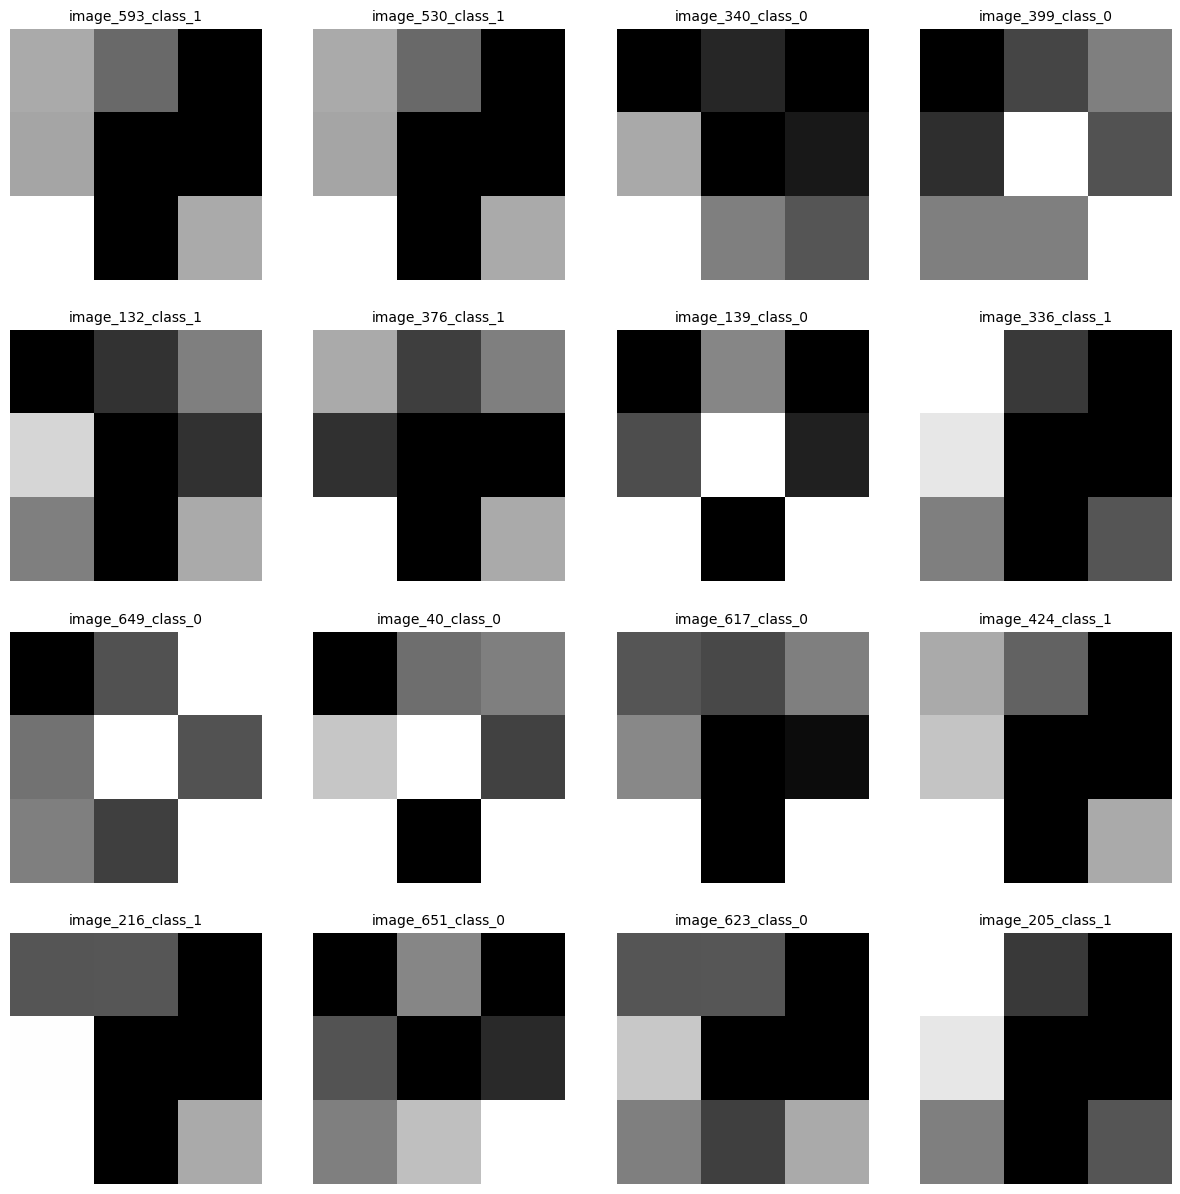

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 4
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()


In [40]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

params = {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.22, 'conv2d_filters_1': 20, 'conv2d_kernel_size_1': 2, 'conv2d_mp_1': 2,
                                              'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.05,
                                              'conv2d_filters_2': 40, 'conv2d_kernel_size_2': 2, 'conv2d_mp_2': 2, 'conv2d_strides_2': 2,
                                              'kernel_regularizer_2': 0.0, 'layers': 'two'},
          'dense_layers': {'dense_do_1': 0.22, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
          'epochs': 300, 'lr': 0.001, 'optimizer': 'adam'}

In [41]:
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

def f1_custom(y_true, y_pred):
    y_t = np.argmax(y_true, axis=1)
    y_p = np.argmax(y_pred, axis=1)
    f1_score(y_t, y_p, labels=None, average='weighted', sample_weight=None, zero_division='warn')

def create_model_cnn(params):
    model = Sequential()

    print("Training with params {}".format(params))
    # (batch_size, timesteps, data_dim)
    # x_train, y_train = get_data_cnn(df, df.head(1).iloc[0]["timestamp"])[0:2]
    conv2d_layer1 = Conv2D(params["conv2d_layers"]["conv2d_filters_1"],
                           params["conv2d_layers"]["conv2d_kernel_size_1"],
                           strides=params["conv2d_layers"]["conv2d_strides_1"],
                           kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_1"]),
                           padding='valid',activation="relu", use_bias=True,
                           kernel_initializer='glorot_uniform',
                           input_shape=(x_train[0].shape[0],
                                        x_train[0].shape[1], x_train[0].shape[2]))
    model.add(conv2d_layer1)
    if params["conv2d_layers"]['conv2d_mp_1'] == 1:
        model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(params['conv2d_layers']['conv2d_do_1']))
    if params["conv2d_layers"]['layers'] == 'two':
        conv2d_layer2 = Conv2D(params["conv2d_layers"]["conv2d_filters_2"],
                               params["conv2d_layers"]["conv2d_kernel_size_2"],
                               strides=params["conv2d_layers"]["conv2d_strides_2"],
                               kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_2"]),
                               padding='valid',activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform')
        model.add(conv2d_layer2)
        if params["conv2d_layers"]['conv2d_mp_2'] == 1:
            model.add(MaxPool2D(pool_size=2))
        model.add(Dropout(params['conv2d_layers']['conv2d_do_2']))

    model.add(Flatten())

    model.add(Dense(params['dense_layers']["dense_nodes_1"], activation='relu'))
    model.add(Dropout(params['dense_layers']['dense_do_1']))

    if params['dense_layers']["layers"] == 'two':
        model.add(Dense(params['dense_layers']["dense_nodes_2"], activation='relu',
                        kernel_regularizer=params['dense_layers']["kernel_regularizer_1"]))
        model.add(Dropout(params['dense_layers']['dense_do_2']))

    model.add(Dense(2, activation='softmax'))
    if params["optimizer"] == 'rmsprop':
        optimizer = optimizers.RMSprop(lr=params["lr"])
    elif params["optimizer"] == 'sgd':
        optimizer = optimizers.SGD(lr=params["lr"], decay=1e-6, momentum=0.9, nesterov=True)
    elif params["optimizer"] == 'adam':
        optimizer = optimizers.Adam(learning_rate=params["lr"], beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_metric])
    # from keras.utils.vis_utils import plot_model use this too for diagram with plot
    # model.summary(print_fn=lambda x: print(x + '\n'))
    return model

def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[1][2]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

Training with params {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.22, 'conv2d_filters_1': 20, 'conv2d_kernel_size_1': 2, 'conv2d_mp_1': 2, 'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.05, 'conv2d_filters_2': 40, 'conv2d_kernel_size_2': 2, 'conv2d_mp_2': 2, 'conv2d_strides_2': 2, 'kernel_regularizer_2': 0.0, 'layers': 'two'}, 'dense_layers': {'dense_do_1': 0.22, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'}, 'epochs': 300, 'lr': 0.001, 'optimizer': 'adam'}


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


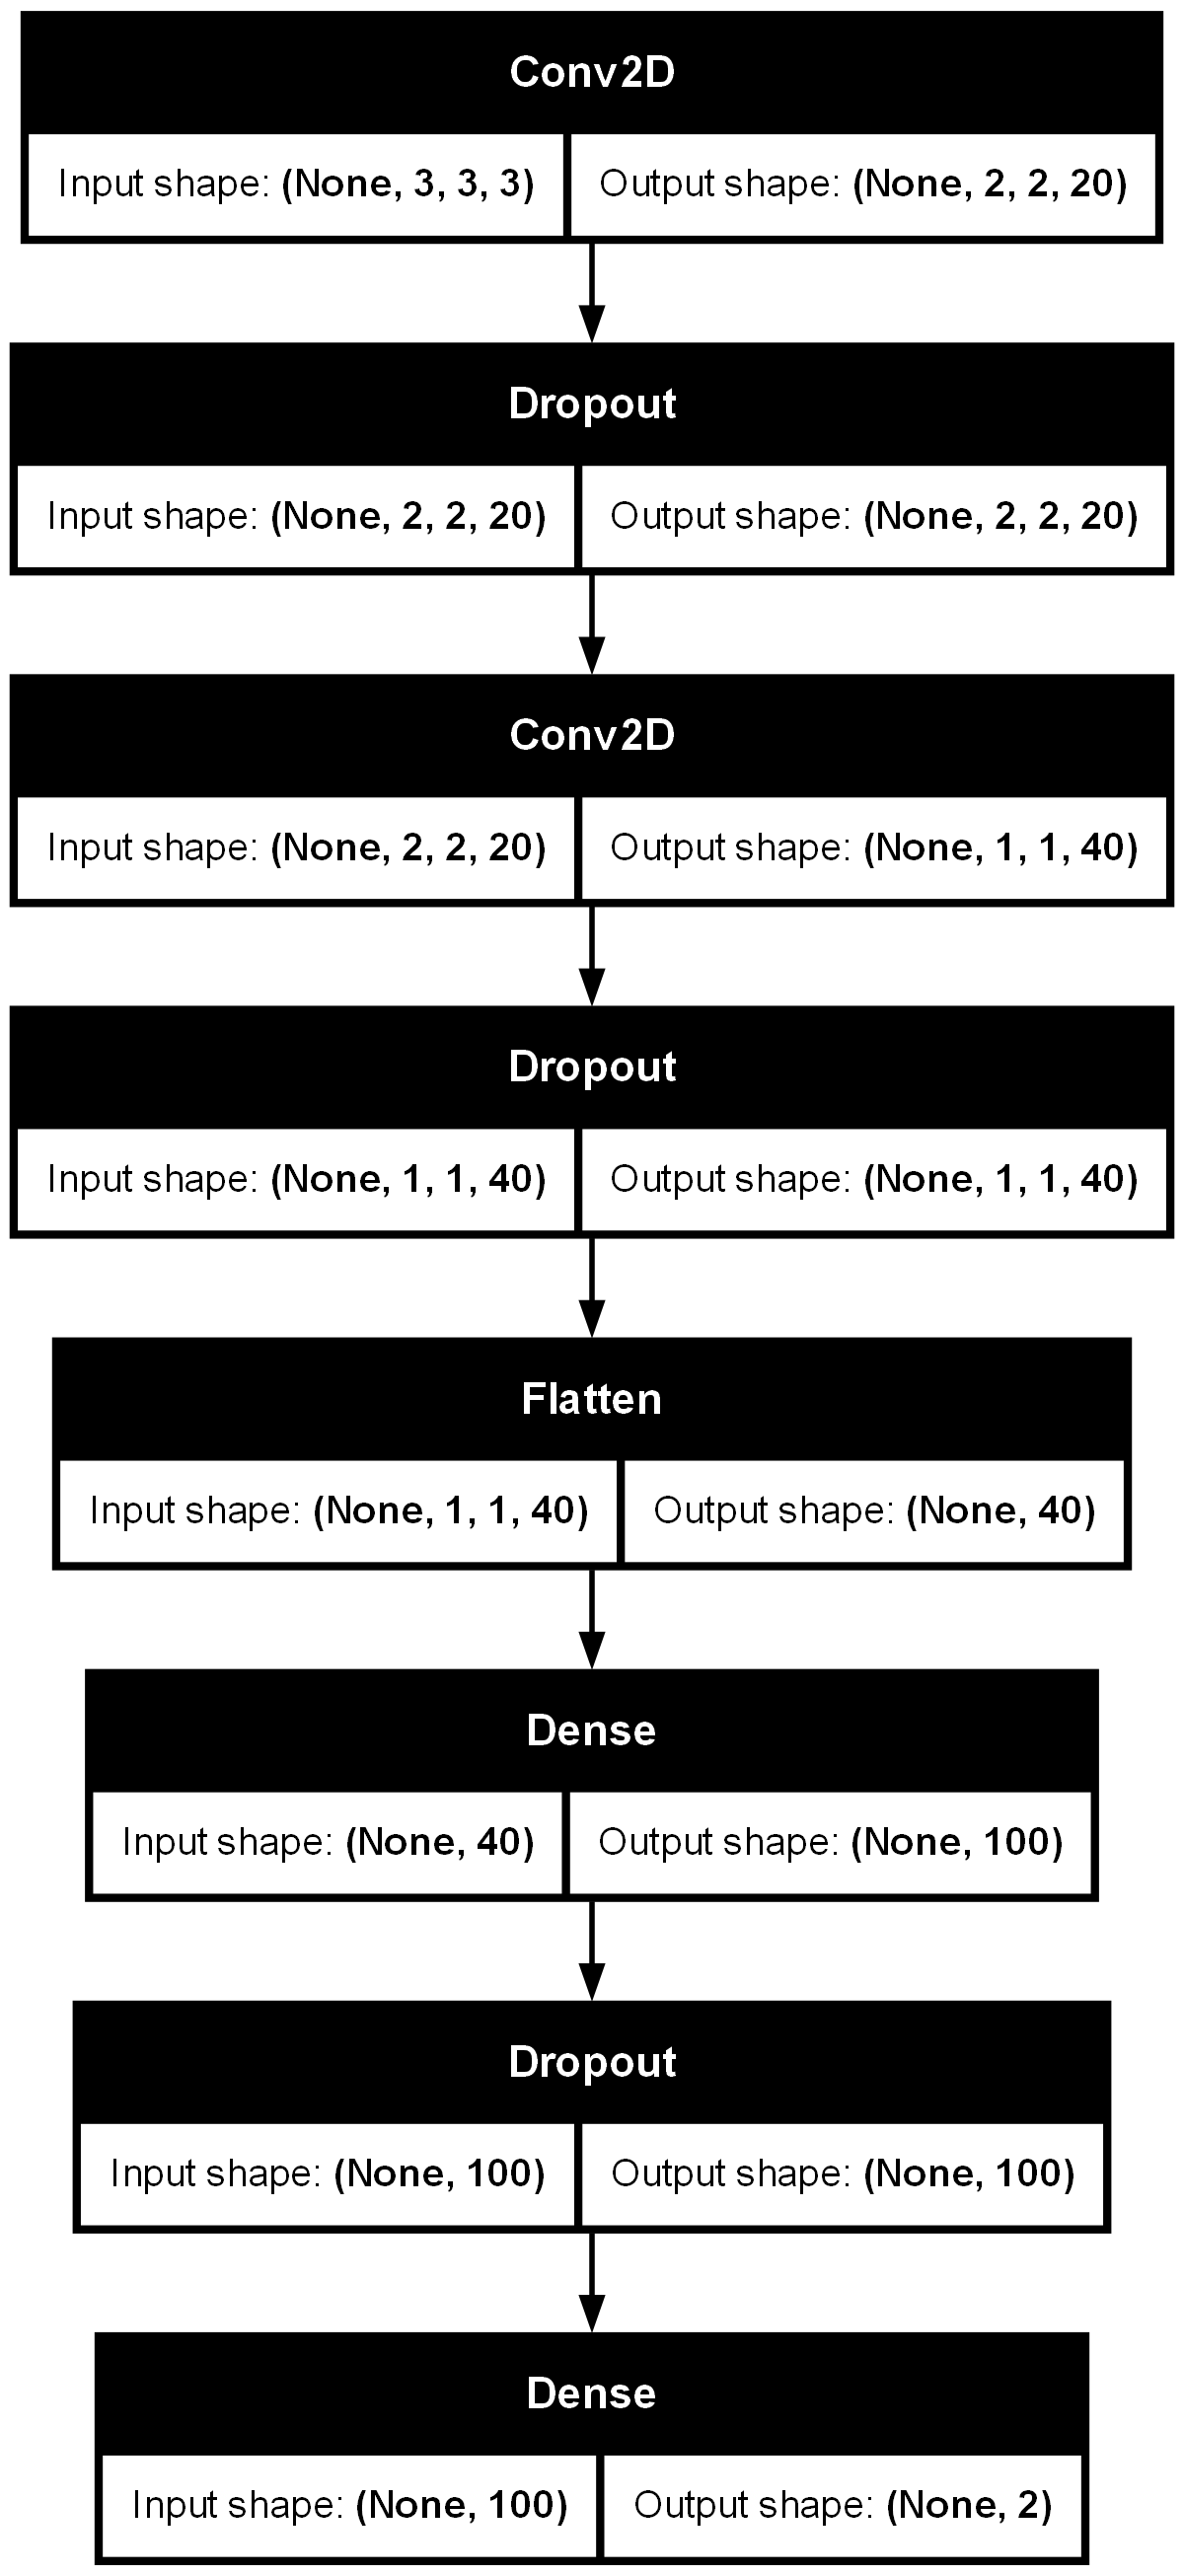

In [42]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

model = create_model_cnn(params)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Correct filepath: must end with .keras
best_model_path = os.path.join('.', 'best_model_keras.keras')

# EarlyStopping callback
es = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1,
    patience=100, min_delta=0.0001
)

# ReduceLROnPlateau callback
rlp = ReduceLROnPlateau(
    monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
    min_delta=0.001, cooldown=1, min_lr=0.0001
)

# ModelCheckpoint callback (fixed: no 'period', correct extension)
mcp = ModelCheckpoint(
    best_model_path,
    monitor='val_f1_metric',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='max'
)


In [45]:
%%time
history = model.fit(x_train, y_train, epochs=params['epochs'], verbose=1,
                            batch_size=64, shuffle=True,
                            # validation_split=0.3,
                            validation_data=(x_cv, y_cv),
                            callbacks=[mcp, rlp, es]
                            , sample_weight=sample_weights)

Epoch 1/300
 1/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.2969 - f1_metric: 0.2969 - loss: 0.7135
Epoch 1: val_f1_metric improved from -inf to 0.74595, saving model to .\best_model_keras.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4666 - f1_metric: 0.4675 - loss: 0.6947 - val_accuracy: 0.7500 - val_f1_metric: 0.7459 - val_loss: 0.6522 - learning_rate: 0.0010
Epoch 2/300
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6250 - f1_metric: 0.6250 - loss: 0.6670
Epoch 2: val_f1_metric did not improve from 0.74595
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7047 - f1_metric: 0.7065 - loss: 0.6475 - val_accuracy: 0.7500 - val_f1_metric: 0.7459 - val_loss: 0.5869 - learning_rate: 0.0010
Epoch 3/300
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6094 - f1_metric: 0.6094 - loss: 0.6394
Epoch 3: val_f1_metric improved from 0.74595 to 0.76157, saving model to .\best_model_keras.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7189 - f1_metric: 

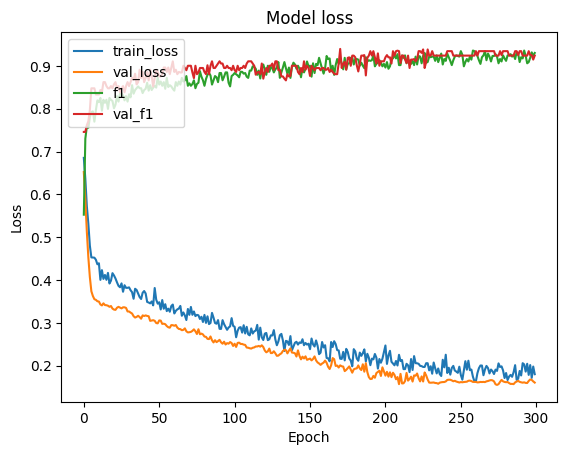

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'f1', 'val_f1'], loc='upper left')
plt.show()


In [47]:
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

model = load_model(best_model_path)
test_res = model.evaluate(x_test, y_test, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1]
# ax = sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
# ax.xaxis.set_ticks_position('top')
f1_weighted = f1_score(y_test_classes, pred_classes, labels=None,
         average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None,
         average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None,
         average='micro', sample_weight=None))  # weighted and micro preferred in case of imbalance
# https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa --> supports multiclass; ref: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
print("cohen's Kappa", cohen_kappa_score(y_test_classes, pred_classes))

prec = []
for i, row in enumerate(conf_mat):
    prec.append(np.round(row[i]/np.sum(row), 2))
    print("precision of class {} = {}".format(i, prec[i]))
print("precision avg", sum(prec)/len(prec))

keras evaluate= [0.20250140130519867, 0.9268292784690857, 0.933035671710968]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[ 89  11]
 [  4 101]]
F1 score (weighted) 0.9266825110169872
F1 score (macro) 0.9265776843914901
F1 score (micro) 0.926829268292683
cohen's Kappa 0.8533269735273075
precision of class 0 = 0.89
precision of class 1 = 0.96
precision avg 0.925
